In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
# Step 1: Define a helper to normalize vectors
def normalize_vector(v):
    norm = np.linalg.norm(v)
    return v if norm == 0 else [i / norm for i in v]

# Step 2: Sample training emails
emails = [
    "free offer win money",
    "get free entry now",
    "meeting schedule for today",
    "project discussion meeting"
]

labels = [1, 1, 0, 0]  # 1 = Spam, 0 = Not Spam

# Step 3: TF (term frequency) and IDF (inverse doc freq)
keywords = ["free", "meeting"]
idf = {}

# Calculate IDF
total_docs = len(emails)
for word in keywords:
    doc_count = sum(1 for email in emails if word in email.split())
    idf[word] = np.log((total_docs + 1) / (doc_count + 1)) + 1

# Build TF-IDF vectors
tfidf_list = []
for email in emails:
    words = email.split()
    tf = {word: words.count(word) / len(words) for word in words}
    tfidf = [tf.get(word, 0) * idf[word] for word in keywords]
    tfidf = normalize_vector(tfidf)
    tfidf_list.append(tfidf)
print("The tfidf list is =",tfidf_list)


The tfidf list is = [[np.float64(1.0), np.float64(0.0)], [np.float64(1.0), np.float64(0.0)], [np.float64(0.0), np.float64(1.0)], [np.float64(0.0), np.float64(1.0)]]


In [4]:

# Step 4: Train SVM
model = SVC(kernel='linear')
model.fit(tfidf_list, labels)

# Step 5: Predict
predictions = model.predict(tfidf_list)
print("\nPredicted Labels:", predictions)
print("Accuracy:", accuracy_score(labels, predictions))

# Step 6: Test on a new email
test_email = "Free medicine available".split()
test_tf = {word: test_email.count(word) / len(test_email) for word in test_email}
test_tfidf = [test_tf.get(word, 0) * idf.get(word, 0) for word in keywords]
test_tfidf = normalize_vector(test_tfidf)

result = model.predict([test_tfidf])
print("\nTest Email:", " ".join(test_email))
print("Prediction:", "Spam" if result[0] == 1 else "Not Spam")




Predicted Labels: [1 1 0 0]
Accuracy: 1.0

Test Email: Free medicine available
Prediction: Spam


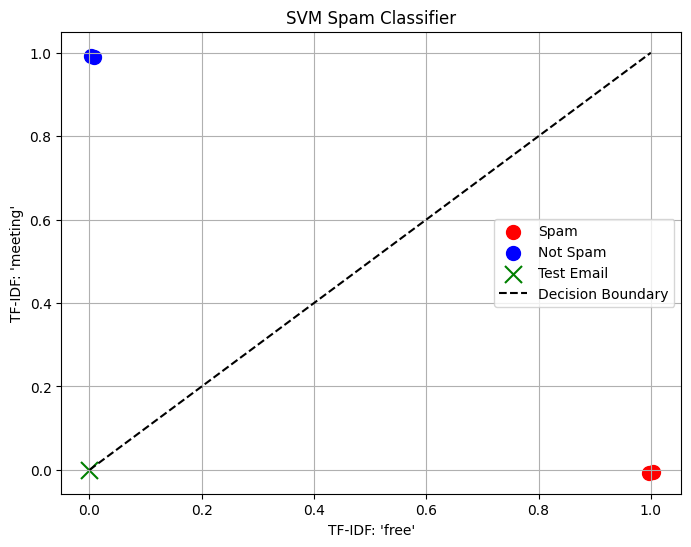

In [6]:
# Step 7: Plot
plt.figure(figsize=(8, 6))

# Track which labels have already been added to the legend
added_labels = set()

for i in range(len(tfidf_list)):
    x, y = tfidf_list[i]
    x += np.random.uniform(-0.01, 0.01)
    y += np.random.uniform(-0.01, 0.01)
    color = 'red' if labels[i] == 1 else 'blue'
    label = 'Spam' if labels[i] == 1 else 'Not Spam'

    # Only add label once to avoid duplicate legend entries
    if label not in added_labels:
        plt.scatter(x, y, c=color, label=label, s=100)
        added_labels.add(label)
    else:
        plt.scatter(x, y, c=color, s=100)

# Plot test email
plt.scatter(test_tfidf[0], test_tfidf[1], c='green', marker='x', s=150, label='Test Email')

# Plot decision boundary
w = model.coef_[0]
b = model.intercept_[0]
x_vals = np.linspace(0, 1, 100)
y_vals = -(w[0] * x_vals + b) / w[1]  # ✅ fixed typo

plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

plt.xlabel("TF-IDF: 'free'")
plt.ylabel("TF-IDF: 'meeting'")
plt.title("SVM Spam Classifier")
plt.legend()
plt.grid(True)
plt.savefig('spam_plot.png')
plt.show()
